SRL Project
=============

Jose Millan - jampmil@gmail.com

Statistical Relational Learning - DMKM

A Bayesian Network G, with $N = 20$ vertices and $M = 30$ edges, is given by means of its adjacency matrix A, and is reported in the file "graph". All variables are binary. The adjacency matrix is given in the file "matrix.csv"
The joint probability distribution is, as usual:

$P(X) = \prod_{k=1}^N P(X_k | PA_k)$
 
where $PA_k$ denotes the set of parents of $X_k$.


__________________________________
The following project makes use of the following Python libraries for modeling the Bayesian Network:

* `networkx`:  Python library for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. Read more [here](https://networkx.github.io/).
* `pebl`:  Python library for learning the structure of a Bayesian network. Read more [here](http://pythonhosted.org/pebl/index.html).
____________________________________________________

Considering this the first step is to create the network's graph. For this, the library `networkx` was used.

In [1]:
#Imports for the program
import networkx as nx
import numpy as np
import itertools as itertools
import random as random
from pebl import data
from pebl.learner import greedy

In [2]:
#Initialize random seed
random.seed(a=42)

In [3]:
#Given matrix
mat = np.matrix(
    [[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0],
    [1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
    )

In [4]:
#Creates the graph based on the matrix
G = nx.from_numpy_matrix(mat, create_using=nx.DiGraph())

In [5]:
# change the labels adding 1 to match given matrix
relabel = dict(map(lambda x: (x, x+1),range(0,20)))
G = nx.relabel_nodes(G,relabel)

In [6]:
#Function to plot the graph in similar positions as the given graph
def plotGraph(graph):
    import matplotlib.pyplot as plt
    #position of the nodes as given by the input file
    position = {
        1:[0.2,0.25],
        2:[-0.33,0.75],
        3:[0.8,-0.1],
        4:[-0.4,-0.75],
        5:[-1,0],
        6:[0.3,-0.9],
        7:[0.85,-0.7],
        8:[-0.05,-1],
        9:[0,0],
        10:[-0.66,0.5],
        11:[1,-0.15],
        12:[0.45,-0.7],
        13:[0.5,0.75],
        14:[0,0.5],
        15:[0.45,0.3],
        16:[0.45,-0.28],
        17:[0,-0.42],
        18:[0.75,0.25],
        19:[-1,-0.85],
        20:[-1,1]

    }
    
    roots = [n for n,d in graph.in_degree().items() if d==0]
    leafs = [n for n,d in graph.out_degree().items() if d==0]
    nx.draw(graph, 
            pos = position,
            node_size=500,
            alpha=0.8,
            node_color='y')

    nx.draw_networkx_nodes(graph,
                        pos = position,
                        nodelist=roots,
                        node_color='g',
                        node_size=500,
                        alpha=0.8)
    nx.draw_networkx_nodes(graph,
                        pos = position,
                        nodelist=leafs,
                        node_color='r',
                        node_size=500,
                        alpha=0.7)
    nx.draw_networkx_labels(graph, 
                            pos = position,)
    plt.show()

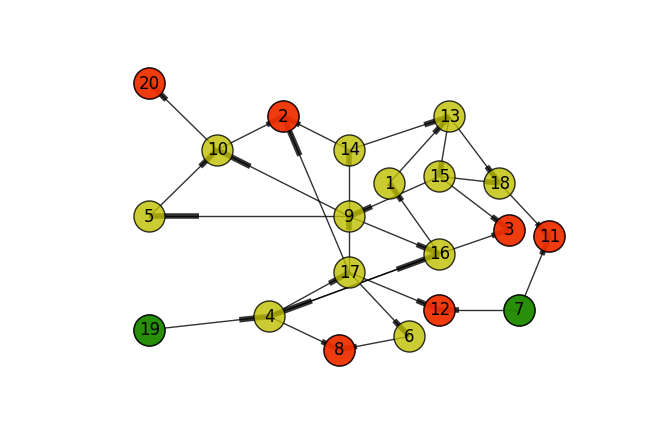

In [7]:
#Plot the graph before any change
#The green nodes are roots while the red nodes are leafs
plotGraph(G)

## Exercise 1
Check whether the network has some loops, and, if yes, change the orientation of edges to eliminate them.

In [8]:
#Get the current cycles in the graph, if there are then reverse the edge of the first two elements
cycles = list(nx.simple_cycles(G))
print 'Cycles before: ', cycles
for cycle in cycles:
    #reverses the edge between the first and second elements
    e1 = cycle[0]
    e2 = cycle[1]
    G.add_edge(e2,e1)
    G.remove_edge(e1,e2)

cycles = list(nx.simple_cycles(G))
print 'Cycles after: ', cycles

Cycles before:  [[1, 13, 15, 9, 16], [4, 17, 9, 16], [4, 16], [9, 14, 13, 15]]
Cycles after:  []


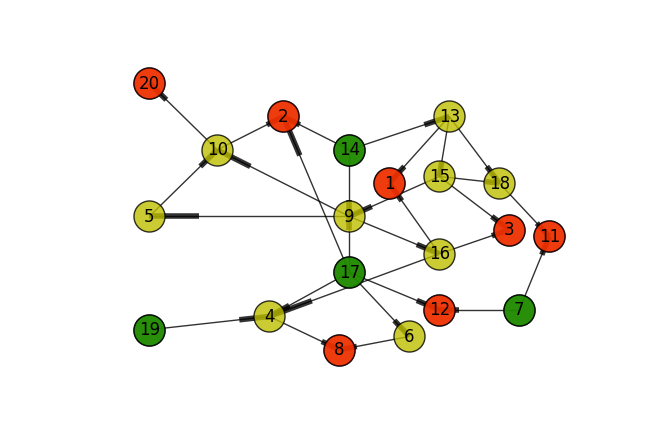

In [9]:
#Plot the graph after the changes
plotGraph(G)

In [10]:
#Function that creates the ID of a node dictionary for all the nodes
def createNodeIdDict(graph):
    idNodeDict = {}
    for node in graph.nodes_iter():
        idNode = str(node)
        preds = graph.predecessors(node)
        if len(preds) > 0:
            idNode += "|" + ','.join(map(str, preds))
        idNodeDict[node] = idNode
    return idNodeDict

In [11]:
#Creates the nodeIdDict for G
idNodeDict = createNodeIdDict(G)

In [12]:
#Check if the final graph is a Directed Acyclic Graph
print 'Is G DCA? ' + str(nx.is_directed_acyclic_graph(G))

Is G DCA? True


## Exercise 2
Define, for each variable $X_k$ , either $P(X_k)$, if $X_k$ has no parents,  or $P(X_k | PA_k)$.

In [13]:
#Function returns the string version of a printed node's probabilities
def getPrintedNode(graph, node, idNodeDict, nodeProbs, observedValues = {}):
    
    #Variable to store the printed node
    printedNode = ''
    
    #ID of the node in the dictionary
    nodeId = idNodeDict[node]
    
    #In case the current node is observed
    selfHead = str(node)
    obs = ''
    if len(observedValues) and observedValues[node] != None:
        selfHead += '=' + observedValues[node]
        obs = '<Observed>'
    
    #Creates the printed tittle for the node
    prtNodeId = 'P(' + nodeId + ')'
    if len(observedValues) > 0:

        
        preds = graph.predecessors(node)
        if len(preds) > 0:
            tail = []
            for pred in preds:
                if observedValues[pred] == None:
                    tail.append(str(pred))
                else:
                    tail.append(str(pred) + '=' + observedValues[pred])
            prtNodeId = 'P(' + selfHead + "|" + ','.join(tail) + ')'
    
    #Tab space
    tab = '    '
    
    printedNode += prtNodeId + obs + ':\n'
    
    headNodeId = '|' + (nodeId if len(nodeId) > 1 else ' ' + nodeId) + ' | ' + prtNodeId
    if '|' in nodeId:
        spNodeId = [nodeId.split('|')[0]] + nodeId.split('|')[1].split(',')
        spNodeId = map(lambda x: ' ' + x + ('' if len(x) > 1 else ' '), spNodeId)
        headNodeId = '|' + "|".join(spNodeId) + '| ' + prtNodeId


    printedNode +=  tab + '_' * (len(headNodeId) + 1) + '\n'
    printedNode +=  tab + headNodeId + '\n'
    for values in nodeProbs[nodeId]:
        spValues = values.split(',')
        prtValues =  " | ".join(spValues) 
        prtValues = '| ' + prtValues + ' | ' + str(round(nodeProbs[nodeId][values], 2))
        printedNode +=  tab + prtValues + '\n'
    printedNode += tab + '-' * (len(headNodeId) + 1) + '\n'
    
    return printedNode


#Function that prints the probabilities of all nodes in the network
def printNodesProbabilities(graph, idNodeDict, nodeProbs, observedValues = {}):
    
    #Get the correct sort of the nodes of the graph
    orderedNodes = nx.topological_sort(graph)
    
    strToPrint = ''
    for node in orderedNodes:
        nodeId = idNodeDict[node]
        strToPrint += getPrintedNode(graph, node, idNodeDict, nodeProbs, observedValues)
    
    print strToPrint
        

In [14]:
#Function that assigns random probabilities to each node of the graph
def getRandomProbabilitiesForNode(graph, idNode, nodeProbs):
    newNodeProbs = {}
    for key in nodeProbs:
        if nodeProbs[key] is None:
            opposite = '1' if key[0] == '0' else '0'
            opposite = opposite + key[1:]
            
            randNum = random.random()
            nodeProbs[key] = randNum
            nodeProbs[opposite] = (1 - randNum)
        
    newNodeProbs =  nodeProbs
    return newNodeProbs


In [15]:
#Get the nodes from which the given node depends on
def getDependencyOfNode(idNode):
    deps = idNode.split('|')
    if len(deps) > 1:
        return map(int, deps[1].split(','))
    else:
        return []

Now we assign $P(X) = \prod_{k=1}^N P(X_k | PA_k)$ with random probabilities based on the structure of the graph

In [16]:
#Function that gets the probabilties of a given structure
def getProbabilitiesOfStructure(graph, idNodeDict):
    #hashmap with probabilities of each node to be 0
    probs = {}

    #Iterate through each node and its probability distribution (random)
    for node in graph.nodes_iter():
        preds = graph.predecessors(node)
        idNode = idNodeDict[node]

        nodeProbs =  {}
        combinations = list(itertools.product([0, 1], repeat= 1 + (len(preds))))
        for tup in combinations:
            l = list(tup)
            l = map(str, l)
            nodeProbs[','.join(l)] = None
        nodeProbs = getRandomProbabilitiesForNode(graph, idNode, nodeProbs)

        probs[idNode] = nodeProbs
        
    #return found the probabilities
    return probs

In [17]:
#hashmap with probabilities of each node to be 0
fullNodesProbs = getProbabilitiesOfStructure(G, idNodeDict)

#Print the probabilities found
printNodesProbabilities(G, idNodeDict, fullNodesProbs)

P(19):
    ____________
    |19 | P(19)
    | 1 | 0.78
    | 0 | 0.22
    ------------
P(17):
    ____________
    |17 | P(17)
    | 1 | 0.99
    | 0 | 0.01
    ------------
P(14):
    ____________
    |14 | P(14)
    | 1 | 0.61
    | 0 | 0.39
    ------------
P(13|14):
    ___________________
    | 13| 14| P(13|14)
    | 1 | 1 | 0.94
    | 1 | 0 | 0.65
    | 0 | 1 | 0.06
    | 0 | 0 | 0.35
    -------------------
P(15|13):
    ___________________
    | 15| 13| P(15|13)
    | 1 | 1 | 0.17
    | 1 | 0 | 0.73
    | 0 | 1 | 0.83
    | 0 | 0 | 0.27
    -------------------
P(18|13,15):
    __________________________
    | 18| 13| 15| P(18|13,15)
    | 1 | 1 | 1 | 0.64
    | 1 | 1 | 0 | 0.56
    | 1 | 0 | 0 | 0.68
    | 1 | 0 | 1 | 0.84
    | 0 | 0 | 1 | 0.16
    | 0 | 1 | 0 | 0.44
    | 0 | 1 | 1 | 0.36
    | 0 | 0 | 0 | 0.32
    --------------------------
P(9|17,14,15):
    ________________________________
    | 9 | 17| 14| 15| P(9|17,14,15)
    | 1 | 0 | 1 | 1 | 0.97
    | 0 | 0 | 0 | 1 |

## Exercise 3
Generate, with a method of choice, a sample $D$ of $R = 400$ elements from the distribution $P(X)$. How could you estimate the truthfulness of the sample to the distribution?

________________________
For this we use the logical sampling (also known as forward sampling) method:

In [18]:
#Function that gets the successors of a node in a Nth degree
def getSuccessorsNDegree(graph, node, degree):
    decs = graph.successors(node)
    if degree <= 1:
        return decs
    else:
        allDecs = []
        for dec in decs:
            allDecs += getSuccessorsNDegree(graph, dec, (degree - 1))
        return allDecs
    
getSuccessorsNDegree(G, 14, 1)

[9, 2, 13]

In [19]:
#Function that assigns a sample value of the node based on its distribution 
def sampleNode(graph, node, currentSampleDict):
    #only do something if the current node hasn't been sampled yet
    if currentSampleDict[node] is None: 
        idNode = idNodeDict[node]
        deps = getDependencyOfNode(idNode)
        
        randNum =  random.random()
        
        #key of the prob dictionary of each node when equals to 0
        keyProbCurrentNode = '0'
        
        if len(deps) == 0: #basic case when is a root
            keyProbCurrentNode = '0'
        else: #if is not a root grabs the values of the parents
            depsObserved = []
            for dep in deps:
                if currentSampleDict[dep] is None: #if the parent has not been sampled then sample it (shouldn't happen)
                    sampleNode(graph, dep, currentSampleDict)
                depsObserved += [currentSampleDict[dep]]
            keyProbCurrentNode = '0,' + ','.join(depsObserved)
        
        #now sample the node
        nodeProb = fullNodesProbs[idNode][keyProbCurrentNode]
        if randNum <= nodeProb:
            currentSampleDict[node] = '0'
        else:
            currentSampleDict[node] = '1'

In [20]:
#Roots of the graph
roots = [n for n,d in G.in_degree().items() if d==0]

#Number of samples to generate
r = 400
#samples D
samples = []

#Generate R samples using random paths
for i in range(0, r):
    #creates an "empty" dictionary for filling the samples
    currentSampleDict = dict(map(lambda x: (x, None),G.nodes_iter()))
    
    #We make sure we have a topological order by sampling the roots first
    for root in roots:
        sampleNode(G, root, currentSampleDict)

    #after the roots we go deeper by levels of separation from the roots
    maxDepth = nx.dag_longest_path_length(G)
    
    #sample all nodes starting for the succesors of the roots and then incrementing the level up to the leafs
    for depth in range(1, maxDepth+2):
        for root in roots:
            decs = getSuccessorsNDegree(G, root, depth)
            for dec in decs:
                sampleNode(G, dec, currentSampleDict)

    #Construct the string of the current sample
    currentSample = ''
    for node in range(1,21):
        currentSample += currentSampleDict[node]
    samples.append(currentSample)

#Print first 5 samples
print 'Samples obtained (first 5):'
print samples[0:5]



Samples obtained (first 5):
['10101010101110011010', '01000001110100101110', '00001011101011101010', '10001010101011011100', '00001010100000011110']


How could you estimate the truthfulness of the sample to the distribution?

For the forward sampling method, with a set of samples of size $R$, it is known that the probability distribution based on the samples $P'(X)$ is

$P'(X_1 = x_1, X_2 = x_2, ..., X_n = x_n) = \frac{Number Of Samples With (X_1 = x_1, X_2 = x_2, ..., X_n = x_n)}{R}$

Considering this, in order to estimate the truthfulness of the sample to the distribution then 

$AVG( P(X) - P'(X) ) \approx 0 $

In [56]:
def calculateProbability(graph, nodeIdDict, nodesProbs, values):
    
    #If values is a string the converted to dict, otherwise is assumed to be a dict
    valuesDict = {}
    if isinstance(values, str):
        valuesDict = dict(map(lambda x: (x, None),G.nodes_iter()))
        for i in range(len(values)):
            valuesDict[i+1] = values[i]
    else:
        valuesDict = values
    
    #Get the correct sort of the nodes of the graph
    orderedNodes = nx.topological_sort(graph)
    
    finalProb = 1
    for node in orderedNodes:
        idNode = nodeIdDict[node]
        
        currentProb = nodesProbs[idNode]
        
        #construct the key to get the probability of the values in the node
        splIdNode = idNode.split('|')
        nodesInProb = [splIdNode[0]]
        if len(splIdNode) > 1:
            nodesInProb += splIdNode[1].split(',')
        key = []
        for nodeInProb in nodesInProb:
            key.append(valuesDict[int(nodeInProb)])
        key = ','.join(key)
        
        #Now we multiply the current prob with the final prob we are getting
        finalProb = finalProb * currentProb[key]
        
    return finalProb

In [68]:
# Now we calculate the probabilities on the samples
sumDiffs = 0
for sample in samples:
    #number of appearances:
    numApp = samples.count(sample)
    
    #Probability of the current sample within the samples
    probSample = float(numApp) / float(len(samples))
    
    #Probability of the current sample using the probability distribution of G
    probByDist = calculateProbability(G, idNodeDict, fullNodesProbs, sample)
    
    #Calculate the difference and add it to the counter
    sumDiffs += (probSample - probByDist)

# Print the results
print 'The average of the differences between the probabilities of the samples is ' + str(round(sumDiffs / len(samples), 4))
    

The average of the differences between the probabilities of the samples is 0.0024


Considering that the average of the differences is close to 0 we verify the truthfulness of the samples.

## Exercise 4
Starting from $D$ only (i.e., ignoring all the other information, except the number $N$ of nodes in the network), learn the structure and the parameters of a Bayesian network with $N = 20$ binary variables. 

________________________
In order to solve this we use the library `pebl` ([documentation](http://pythonhosted.org/pebl/index.html)) which allows us to learn the structure of the network based on the samples. Pebl is a python library and command line application for learning the structure of a Bayesian network given prior knowledge and observations, supporting missing values as well.

### Exercise 4a
Assume that there are no missing values in $D$ and that there are no hidden variables in the network. 

In [21]:
#First print samples D into a file which pebl can read
samplesFile = 'samples_complete.txt'
fileStr = ',class(0,1)\t'.join(map(str, range(1, 21))) + ',class(0,1)\n'
for sample in samples:
    fileStr += '\t'.join(sample) + '\n'
    
with open(samplesFile, 'w') as f:
    f.write(fileStr)

Now we learn the structure. For this we use a Greedy learning algorithm with 1000000 iterations. The algorithm works as follows:

1. start with a random network
2. Make a small, local change and rescore network
3. If new network scores better, accept it, otherwise reject.
4. Steps 2-3 are repeated till the restarting_criteria is met, at which point we begin again with a new random network (step 1)

In [22]:
#Read the file with pebl and process it
comDataset = data.fromfile(samplesFile)
# comDataset.discretize()

#Configure the learner and run it
comLearner = greedy.GreedyLearner(comDataset, max_iterations=1000000)
comResult = comLearner.run()

#Gets the network with the best score
comBestNet =  comResult.posterior[0]
strComBestNet = comBestNet.as_dotstring()

D:\Software\Anaconda2\lib\site-packages\pebl-1.0.2-py2.7-win-amd64.egg\pebl\cpd.py:132: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.counts[j,k] += change
D:\Software\Anaconda2\lib\site-packages\pebl-1.0.2-py2.7-win-amd64.egg\pebl\cpd.py:133: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.counts[j,-1] += change


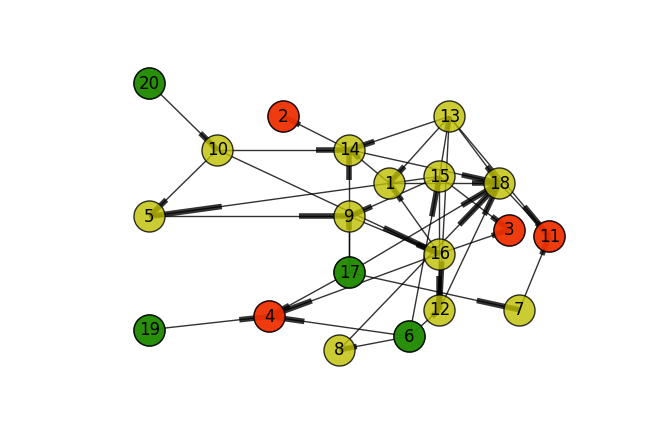

In [23]:
#Create the new graph with the learned structure
comLearnedG = nx.DiGraph()
comLearnedG.add_nodes_from(range(1,21))

#Process the pebl net 
for line in strComBestNet.split('\n'):
    #we are only intereste on the edges
    if '->' in line:
        #remove non necessary characters
        line = line.replace("\"", "")
        line = line.replace(" ", "")
        line = line.replace(";", "")
        #add the edges
        spl = line.split('->')
        comLearnedG.add_edge(int(spl[0]), int(spl[1]))

#Creates the nodeIdDict for comLearnedG
idNodeDictComG = createNodeIdDict(comLearnedG)

#Get the probabilities of the learned structure
comLearnedProbs = getProbabilitiesOfStructure(comLearnedG, idNodeDictComG)
        
#plot the graph with the learned structure
plotGraph(comLearnedG)

### Exercise 4b

Delete 10% of the values in $D$, by replacing them with '?'. Learn the structure and parameters of the network in this case of incomplete data.

In [24]:
# For pebl the incomplete value is X. Now we remove 10% of the data
incompleteSamples = samples[:] #create a copy of the list
lenX = 20
lenY = len(incompleteSamples)

valuesToRemove = int((lenX * lenY) * 0.1)
removedValues = 0

while removedValues < valuesToRemove:
    remX = random.randint(0, (lenX - 1))
    remY = random.randint(0, (lenY - 1))
#     print (remX, remY)

    tempStr = list(incompleteSamples[remY])
    if tempStr[remX] != 'X':
        tempStr[remX] = 'X'
        
        incompleteSamples[remY] = ''.join(tempStr)
        removedValues += 1

#Validate
countX = 0
for s in incompleteSamples:
    countX += s.count("X")
print 'Values to remove: ', valuesToRemove, "Values removed: ", countX

#Print first 5 samples
print 'Incomplete Samples (first 5):'
print incompleteSamples[0:5]

Values to remove:  800 Values removed:  800
Incomplete Samples (first 5):
['10X0101010X11X011010', '0100X00111X100101110', '0000101XX0101110101X', '1000101X101011X1X1X0', 'X00X10X0100000011110']


In [25]:
#print the incomplete samples D into a file which pebl can read
samplesIncompleteFile = 'samples_incomplete.txt'
fileStr = ',class(0,1)\t'.join(map(str, range(1, 21))) + ',class(0,1)\n'
# print fileStr
for sample in incompleteSamples:
    fileStr += '\t'.join(sample) + '\n'
    
with open(samplesIncompleteFile, 'w') as f:
    f.write(fileStr)

In [26]:
#Read the file with pebl and process it
incDataset = data.fromfile(samplesFile)
#incDataset.discretize()

#Configure the learner and run it
incLearner = greedy.GreedyLearner(incDataset, max_iterations=100000) #less iterations otherwise it takes forever
incResult = incLearner.run()

#Gets the network with the best score
incBestNet =  incResult.posterior[0]
strIncBestNet = incBestNet.as_dotstring()

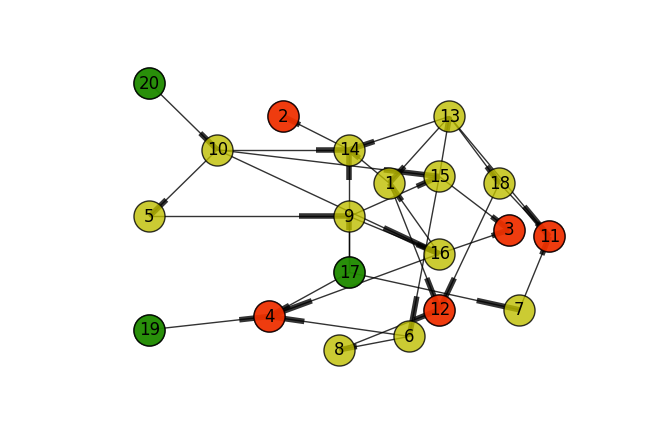

In [27]:
#Create the new graph with the learned structure
incLearnedG = nx.DiGraph()
incLearnedG.add_nodes_from(range(1,21))

#Process the pebl net 
for line in strIncBestNet.split('\n'):
    #we are only intereste on the edges
    if '->' in line:
        #remove non necessary characters
        line = line.replace("\"", "")
        line = line.replace(" ", "")
        line = line.replace(";", "")
        #add the edges
        spl = line.split('->')
        incLearnedG.add_edge(int(spl[0]), int(spl[1]))

#Creates the nodeIdDict for incLearnedG
idNodeDictIncG = createNodeIdDict(incLearnedG)

#Get the probabilities of the learned structure
incLearnedProbs = getProbabilitiesOfStructure(incLearnedG, idNodeDictIncG)

#plot the graph with the learned structure
plotGraph(incLearnedG)

### Exercise 4c
Find a metric to compare the learned network with the original one.

___________________________
`pebl` uses the $BDe$ metric (Bayesian metric with Dirichlet priors and equivalence) for scoring networks (as stated [here](http://g6g-softwaredirectory.com/ai/Bayesian-networks/20700-Univ-Mich-pebl.php)). 

The BD metric is calculated using

$\quad\quad P(B,T) = P(B) \times \prod_{i=1}^{n} \prod_{j=1}^{q_i}(\frac{\Gamma(N'_{ij})}{\Gamma(N_{ij} + N'_{ij}} \times \prod_{k=1}^{\gamma_i} \frac{\Gamma (N_{ijk} + N'_{ijk})}{\Gamma(N'_{ijk})})$

where $\Gamma$ is the Gamma function, $T$ is the data and $P(B)$ represents the prior probability of the network $B$.

Heckerman, Geiger and Chickering turn around the problem of hyperparameter specification by considering two additional assumptions: likelihood equivalence and structure possibility. With this the $BDe$ metric uses

$\quad\quad N'_{ijk} = N' \times P(X_i = x_{ik}, \Pi x_i = w_{ij} | G)$

In [28]:
# Get the scores of both structures
comNetScore = comBestNet.score
incNetScore = incBestNet.score

higherScoreStr = 'Structure with Full Samples' if comNetScore > incNetScore else 'Structure with Missing Values in Samples'

print 'The structure with the highest BDe score is the ' + higherScoreStr
print 'Score = ' + str(comNetScore if comNetScore > incNetScore else incincNetScoreBestNet)

The structure with the highest BDe score is the Structure with Full Samples
Score = -3769.97867545


With the results obtained, and as it could be supposed, the structure learned with the complete sample $D$ has a higher score than the structure learned with the sample with missing values.

## Exercise 5
Assume the following values have been observed in the network (evidence E):

$\quad\quad\quad X_2 = X_4 = 1 \quad\quad\quad\quad X_1 = X_9 = X_{12} = X_{15} = X_{17} = 0$
     
Compute the marginal distribution of node X16 in the original network. Repeat in the learned network. Discuss the obtained results.


_________________
For calculating the marginal distribution of both the original and learned networks we use the Sum-Product algorithm. Having in mind that $P(X)= \prod_{s=1}^{k} f_s(x_s)$ where $k$ is the number of factors and $x_s$ is the subset of variables in the scope of factor $f_s$.



In [29]:
# Create dictionary of observed values
observedValues = dict(map(lambda x: (x, None),G.nodes_iter()))

#Fill the observed values
observedValues[2] = '1'
observedValues[4] = '1'
observedValues[1] = '0'
observedValues[9] = '0'
observedValues[12] = '0'
observedValues[15] = '0'
observedValues[17] = '0'

In [30]:

def marginalizeProbabilities(graph, nodeIdDict, nodesProbs, observedValues):
    #Get the correct sort of the nodes of the graph
    orderedNodes = nx.topological_sort(graph)
    
    #Dictionary to store all the new probabilities
    margNodeProbs = {}
    
    
    for node in orderedNodes:
        #print nodeIdDict
        #print node
        idNode = nodeIdDict[node]
        #Get the current probs of the node
        nodeProbs = nodesProbs[idNode].copy()
        
        #Check if the current node is observed or not
        if observedValues[node] != None:
            #Clear the probs and assign to the value prob = 1
            nodeProbs.clear()
            nodeProbs[observedValues[node]] = 1.0
        else:
            #Split the ID to check if it depends on other nodes or not
            spltIdNode = idNode.split('|')
            
            if len(spltIdNode) > 1: #Do nothing if node is root
                preds = map(int, spltIdNode[1].split(','))
                for i in range(len(preds)):
                    #Check if the predecessor was observed
                    if observedValues[preds[i]] != None:
                        #remove all probs with diff value
                        keyProbs = nodeProbs.keys()
                        for keyProb in keyProbs:
                            spKeyProb = keyProb.split(',')
                            #Check if the value is the same (i+1 because the current node is in pos 0)
                            if spKeyProb[i+1] != observedValues[preds[i]]:
                                del nodeProbs[keyProb]
        
        #Add the node probs to the margNodeProbs
        margNodeProbs[idNode] = nodeProbs
    
    #Return the marginal probabilities
    return margNodeProbs

In [31]:
#Calculate the marginal probabilities of the original network
margOriginalProbs = marginalizeProbabilities(G, idNodeDict, fullNodesProbs, observedValues)

#Calculate the marginal probabilities of the learned network
margLearnedProbs = marginalizeProbabilities(comLearnedG, idNodeDictComG, comLearnedProbs, observedValues)

In [33]:
#Print the marginalized probabilities of the original network
printNodesProbabilities(G, idNodeDict, margOriginalProbs, observedValues)

P(19):
    ____________
    |19 | P(19)
    | 1 | 0.78
    | 0 | 0.22
    ------------
P(17)<Observed>:
    ____________
    |17 | P(17)
    | 0 | 1.0
    ------------
P(14):
    ____________
    |14 | P(14)
    | 1 | 0.61
    | 0 | 0.39
    ------------
P(13|14):
    ___________________
    | 13| 14| P(13|14)
    | 0 | 0 | 0.35
    | 0 | 1 | 0.06
    | 1 | 0 | 0.65
    | 1 | 1 | 0.94
    -------------------
P(15=0|13)<Observed>:
    _____________________
    | 15| 13| P(15=0|13)
    | 0 | 1.0
    ---------------------
P(18|13,15=0):
    ____________________________
    | 18| 13| 15| P(18|13,15=0)
    | 1 | 1 | 0 | 0.56
    | 1 | 0 | 0 | 0.68
    | 0 | 1 | 0 | 0.44
    | 0 | 0 | 0 | 0.32
    ----------------------------
P(9=0|17=0,14,15=0)<Observed>:
    ______________________________________
    | 9 | 17| 14| 15| P(9=0|17=0,14,15=0)
    | 0 | 1.0
    --------------------------------------
P(16|9=0):
    ____________________
    | 16| 9 | P(16|9=0)
    | 0 | 0 | 0.62
    | 1 | 0 | 0.38

In [34]:
#Print the marginalized probabilities of the learned network
printNodesProbabilities(comLearnedG, idNodeDictComG, margLearnedProbs, observedValues)

P(20):
    ____________
    |20 | P(20)
    | 1 | 0.01
    | 0 | 0.99
    ------------
P(19):
    ____________
    |19 | P(19)
    | 1 | 0.74
    | 0 | 0.26
    ------------
P(17)<Observed>:
    ____________
    |17 | P(17)
    | 0 | 1.0
    ------------
P(10|20):
    ___________________
    | 10| 20| P(10|20)
    | 0 | 0 | 0.27
    | 0 | 1 | 0.47
    | 1 | 0 | 0.73
    | 1 | 1 | 0.53
    -------------------
P(7|17=0):
    ____________________
    | 7 | 17| P(7|17=0)
    | 0 | 0 | 0.28
    | 1 | 0 | 0.72
    --------------------
P(6):
    ___________
    | 6 | P(6)
    | 1 | 0.09
    | 0 | 0.91
    -----------
P(8|6):
    _________________
    | 8 | 6 | P(8|6)
    | 0 | 0 | 0.07
    | 0 | 1 | 0.84
    | 1 | 0 | 0.93
    | 1 | 1 | 0.16
    -----------------
P(15=0|6)<Observed>:
    ____________________
    | 15| 6 | P(15=0|6)
    | 0 | 1.0
    --------------------
P(13|15=0):
    _____________________
    | 13| 15| P(13|15=0)
    | 0 | 0 | 0.91
    | 1 | 0 | 0.09
    -------------------

In [37]:
#Print the marginal distributions for Node 16 in both networks
print 'Marginal Dirtribution Node 16 (original network)'
print getPrintedNode(G, 16, idNodeDict, margOriginalProbs, observedValues)

print 'Marginal Dirtribution Node 16 (learned network)'
print getPrintedNode(comLearnedG, 16, idNodeDictComG, margLearnedProbs, observedValues)


Marginal Dirtribution Node 16 (given network)
P(16|9=0):
    ____________________
    | 16| 9 | P(16|9=0)
    | 0 | 0 | 0.62
    | 1 | 0 | 0.38
    --------------------

Marginal Dirtribution Node 16 (learned network)
P(16|9=0,10):
    ___________________________
    | 16| 9 | 10| P(16|9=0,10)
    | 1 | 0 | 0 | 0.22
    | 1 | 0 | 1 | 0.4
    | 0 | 0 | 1 | 0.6
    | 0 | 0 | 0 | 0.78
    ---------------------------



With the results obtained we can see the marginal distributions of node 16 for both the original network and the network learned from the complete samples.

Considering that the structure is not the same (node 16 depends on different nodes in the learned network), its marginal probabilities are distributed along the other nodes, nevertheless it doesn't change for node 9 since it's given.